# Chapter 9 - Building the Regression Model I: Model Selection and Validation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan, anova_lm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
import itertools as iter

DATA_DIR = "../alsm/data"
yhat = '\u0177'
square = '\u00b2'

# 9.1 Overview of Model-Building Process (p 343)

# 9.2 Surgical Unit Example (p 350)

### Input the Surgical Unit Data

In [3]:
df = pd.read_pickle(f"{DATA_DIR}/CH09TA01.xz")
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y', 'lnY']
df_names = [
    'Bloodclot', 'Progindex', 'Enzyme', 'Liver' 
    'Age', 'Gender', 'Alc.Mod', 'Alc.Heavy', 
    'Survival', 'LnSurvival'
]
pred = ['X1', 'X2', 'X3', 'X4']

model_raw = ols("Y ~ X1 + X2 + X3 + X4", df).fit()
model_log = ols("lnY ~ X1 + X2 + X3 + X4", df).fit()

### Table 9.1 (p 350)

Potential Predictor Variables and Response Variable -- Surgical Unit Example

In [4]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y,lnY
0,6.7,62,81,2.59,50,0,1,0,695,6.544
1,5.1,59,66,1.70,39,0,0,0,403,5.999
2,7.4,57,83,2.16,55,0,0,0,710,6.565
3,6.5,73,41,2.01,48,0,0,0,349,5.854
4,7.8,65,115,4.30,45,0,0,1,2343,7.759
5,5.8,38,72,1.42,65,1,1,0,348,5.852
6,5.7,46,63,1.91,49,1,0,1,518,6.250
7,3.7,68,81,2.57,69,1,1,0,749,6.619
8,6.0,67,93,2.50,58,0,1,0,1056,6.962
9,3.7,76,94,2.40,48,0,1,0,968,6.875


### Distributions and Outliers (P 351)

The book talks about the sorts of exploratory graphs that can be done to aid understanding the dataset but does not show them. Below are a few examples. Per the book's description, outliers are clearly present. I opt for box plots over stem-and-leaf plots.

##### Note

When appropriate, I will focus on only showing the 4 chosen predicator variables as the book describes. 

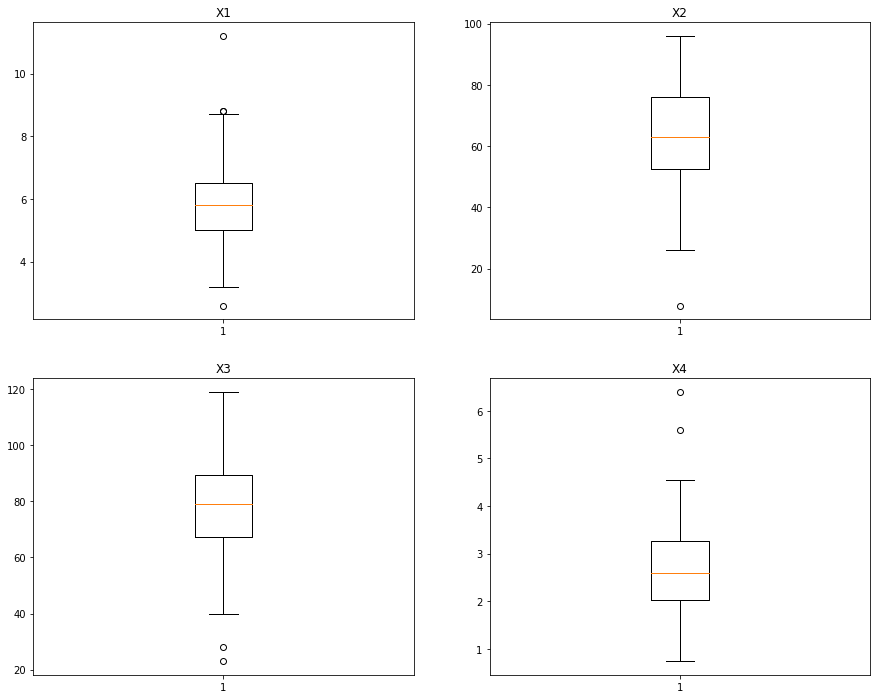

In [5]:
fig, axes = plt.subplots(2, 2, figsize = (15, 12))
for p, ax in zip(pred, axes.flatten()):
    ax.boxplot(df[[p]])
    ax.title.set_text(p)

### Correlations

Here we can observe pariwise correlations or base them by groups according to the three indicator variables ($X_6$ only shown here).

##### Note

I chose to multiply by 100 here for ease of viewing. At least for me it appears clearer when there are more than 5 variables.

In [6]:
df.corr().round(2)*100

,X1,X2,X3,X4,X5,X6,X7,X8,Y,lnY
X1,100.0,9.0,-15.0,50.0,-2.0,4.0,-10.0,22.0,35.0,25.0
X2,9.0,100.0,-2.0,37.0,-5.0,12.0,13.0,-8.0,42.0,47.0
X3,-15.0,-2.0,100.0,42.0,-1.0,14.0,-9.0,12.0,58.0,65.0
X4,50.0,37.0,42.0,100.0,-21.0,30.0,-2.0,13.0,67.0,65.0
X5,-2.0,-5.0,-1.0,-21.0,100.0,1.0,15.0,-11.0,-12.0,-14.0
X6,4.0,12.0,14.0,30.0,1.0,100.0,4.0,-6.0,17.0,23.0
X7,-10.0,13.0,-9.0,-2.0,15.0,4.0,100.0,-51.0,-18.0,-13.0
X8,22.0,-8.0,12.0,13.0,-11.0,-6.0,-51.0,100.0,42.0,37.0
Y,35.0,42.0,58.0,67.0,-12.0,17.0,-18.0,42.0,100.0,93.0
lnY,25.0,47.0,65.0,65.0,-14.0,23.0,-13.0,37.0,93.0,100.0


In [7]:
df.groupby("X6").corr().round(2)*100

X1     X2     X3     X4     X5     X7     X8      Y    lnY
X6                                                                   
0  X1   100.0   -4.0  -30.0   35.0   11.0   -9.0   18.0   14.0    3.0
   X2    -4.0  100.0    6.0   25.0   11.0   20.0  -26.0   24.0   31.0
   X3   -30.0    6.0  100.0   42.0   -3.0    9.0   12.0   68.0   81.0
   X4    35.0   25.0   42.0  100.0  -10.0   13.0    6.0   56.0   52.0
   X5    11.0   11.0   -3.0  -10.0  100.0   32.0   -0.0   -9.0   -8.0
   X7    -9.0   20.0    9.0   13.0   32.0  100.0  -53.0  -10.0   -7.0
   X8    18.0  -26.0   12.0    6.0   -0.0  -53.0  100.0   39.0   37.0
   Y     14.0   24.0   68.0   56.0   -9.0  -10.0   39.0  100.0   90.0
   lnY    3.0   31.0   81.0   52.0   -8.0   -7.0   37.0   90.0  100.0
1  X1   100.0   20.0    3.0   68.0  -15.0  -10.0   28.0   60.0   54.0
   X2    20.0  100.0  -14.0   42.0  -16.0    5.0   11.0   57.0   63.0
   X3     3.0  -14.0  100.0   38.0   -0.0  -32.0   14.0   43.0   41.0
   X4    68.0   42.0   38.0  100.0  -31.0  -19.0   25.0   77.0   76.0
   X5   -15.0  -16.0   -0.0  -31.0  100.0   -1.0  -23.0  -15.0  -24.0
   X7   -10.0    5.0  -32.0  -19.0   -1.0  100.0  -49.0  -29.0  -24.0
   X8    28.0   11.0   14.0   25.0  -23.0  -49.0  100.0   49.0   44.0
   Y     60.0   57.0   43.0   77.0  -15.0  -29.0   49.0  100.0   97.0
   lnY   54.0   63.0   41.0   76.0  -24.0  -24.0   44.0   97.0  100.0

### Scatter Plot Matrix

The default diagonal is a histogram, but to me I've always found a kernel based distribution to be more directly informative. Markers were also enlarged by using an `"o"` type for more clarity. If overplotting is a concern, tweak the alpha value for transparency. Something should be done to better visualize the indicator variables $X_6$, $X_7$, and $X_8$

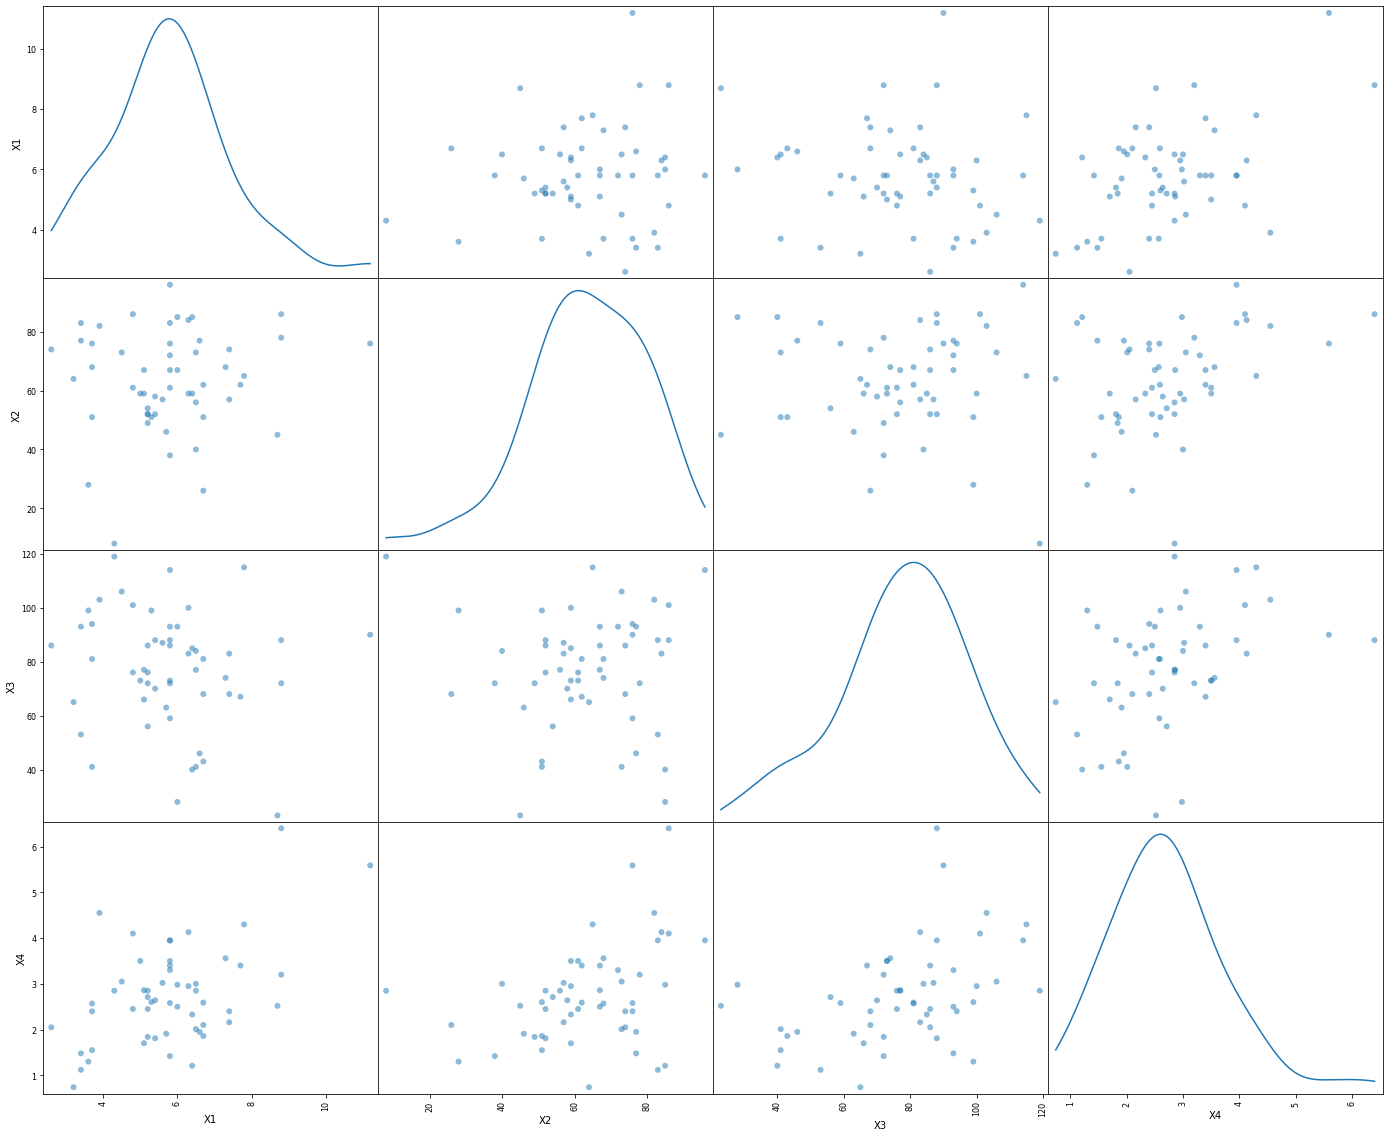

In [8]:
_ = pd.plotting.scatter_matrix(df[pred], figsize=(24, 20), marker="o", diagonal="kde")

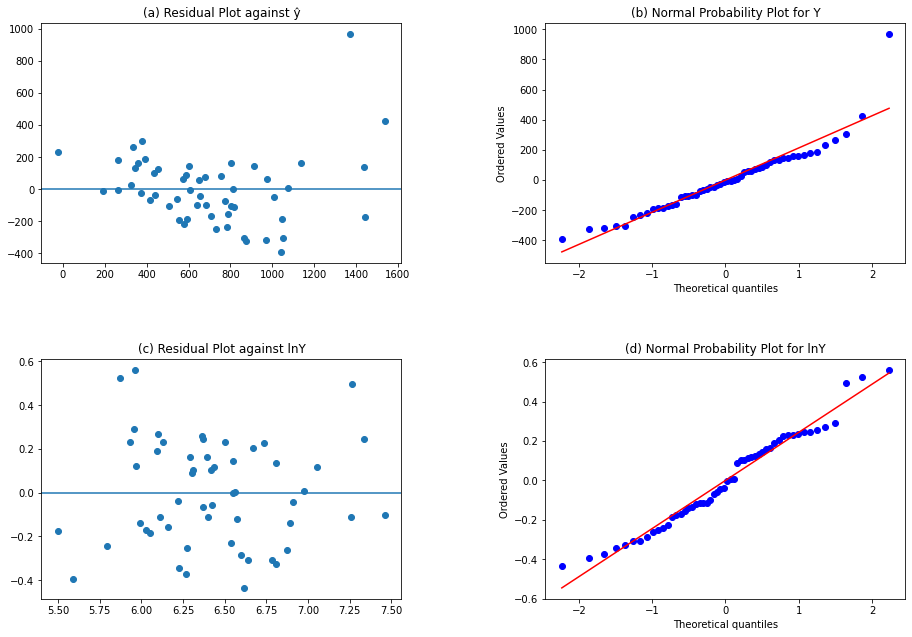

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

axes[0][0].scatter(model_raw.fittedvalues, model_raw.resid)
axes[0][0].axhline(y=0)
qq = stats.probplot(model_raw.resid, plot=axes[0][1])

axes[1][0].scatter(model_log.fittedvalues, model_log.resid)
axes[1][0].axhline(y=0)
qq = stats.probplot(model_log.resid, plot=axes[1][1])

axes[0][0].set_title(f"(a) Residual Plot against {yhat}")
axes[0][1].set_title("(b) Normal Probability Plot for Y")
axes[1][0].set_title("(c) Residual Plot against lnY")
axes[1][1].set_title("(d) Normal Probability Plot for lnY")
plt.show()


### Figure 9.3 (p 352)

Scatter Plot Matrix and Correlation Matrix when Response Variable is $Y^{'}$ -- Surgical Unit Example

##### Note

Unlike the previous scatter plots, the focus on these are to assess the relationship between the predicators and the response variable (the bottom row of this table). The exploratory data analysis (EDA) plots should have assessed multicollinearity. As the book indicates, $X_3$ and $X_4$ have the highest associated with $Y^{'}$ and $X_1$ the lowest. This is also apparent in the scatter plot matrix.

In [10]:
df[[*pred, "lnY"]].corr().round(2)*100

,X1,X2,X3,X4,lnY
X1,100.0,9.0,-15.0,50.0,25.0
X2,9.0,100.0,-2.0,37.0,47.0
X3,-15.0,-2.0,100.0,42.0,65.0
X4,50.0,37.0,42.0,100.0,65.0
lnY,25.0,47.0,65.0,65.0,100.0


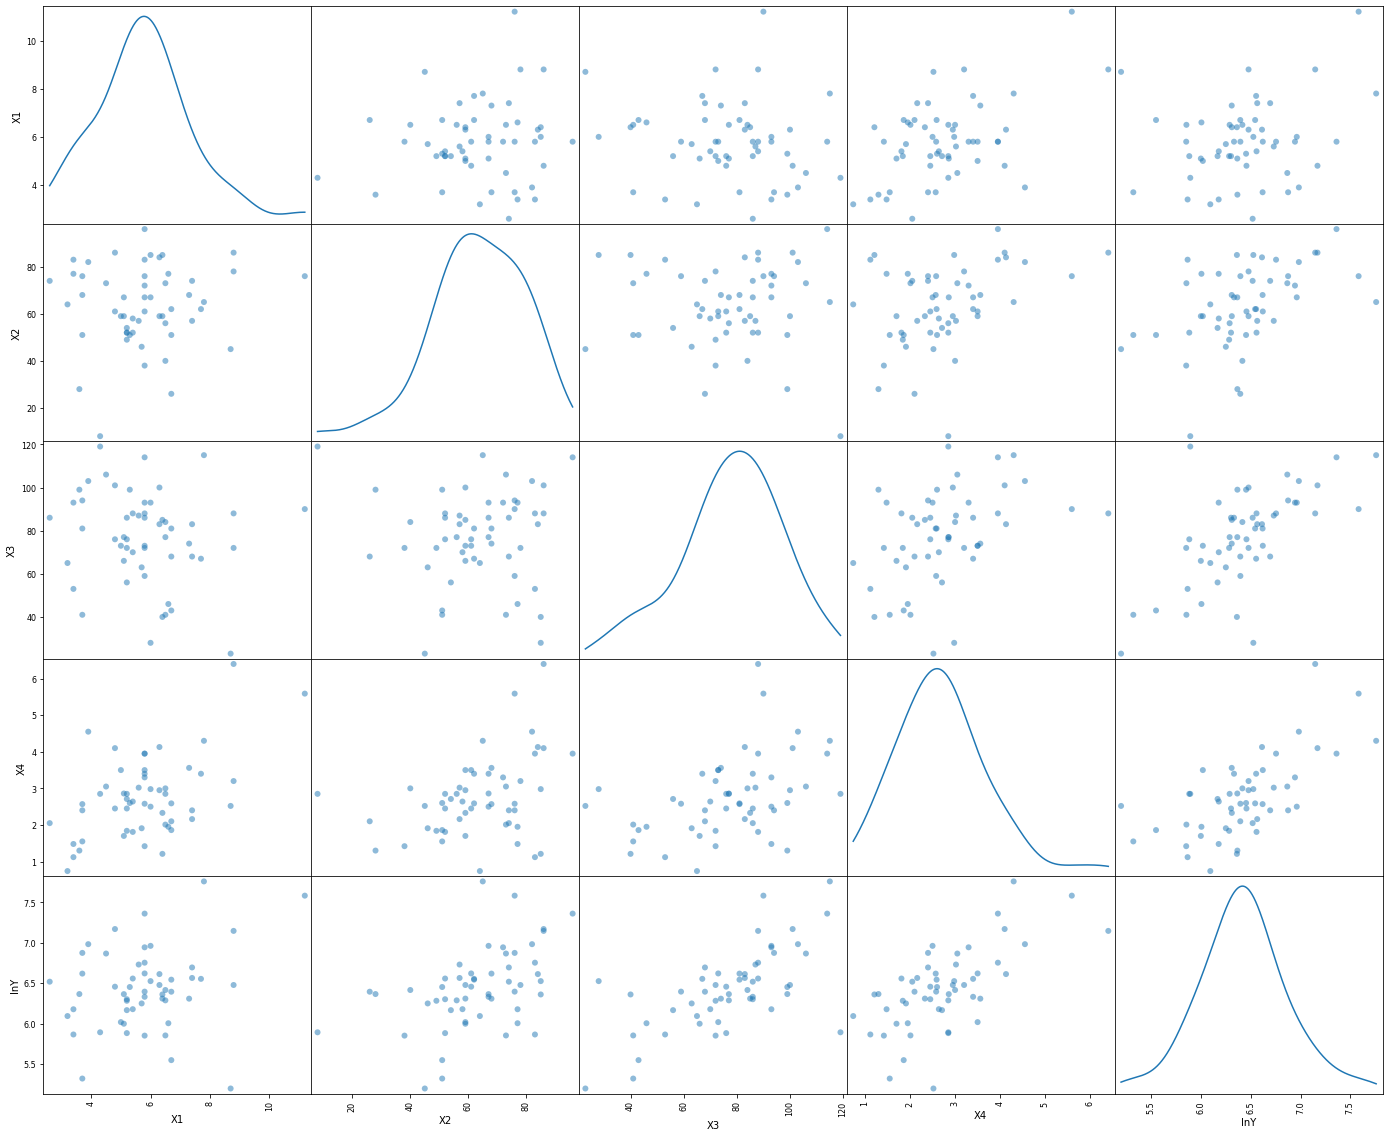

In [11]:
_ = pd.plotting.scatter_matrix(df[[*pred, "lnY"]], figsize=(24, 20), marker="o", diagonal="kde")

### Residual Plots

The book further mentions, but does not show, that assessments of residual plots against the predicators were included. Below are plots of the $Y^{'}$ model residuals against each predicator.

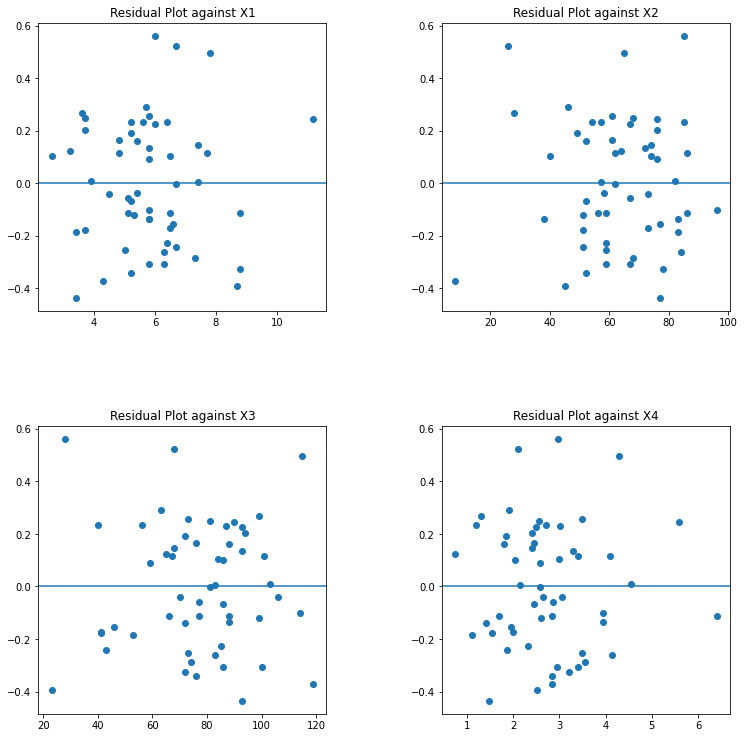

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for p, ax in zip(pred, axes.flatten()):
    ax.scatter(df[p], model_log.resid)
    ax.axhline(y=0)
    ax.set_title(f"Residual Plot against {p}")

plt.show()

# 9.3 Criteria for Model Selection (p 353)

### Table 9.2

$SSE_p$, $R^2_p$, $R^2_{a,p}$, $C_p$, $AIC_p$, $SBC_p$, and $PRESS_p$ Values for All Possible Regression Models -- Surgical Unit Example

##### Note

The goal here is to create all possible predictor combinations and fit those models. Then from each model, extract or compute each of the required validation metrics. I could not find any built-in libraries for producing something like this, but with some python tools, it only takes a few lines of code. 

White the $PRESS_p$ criterion would be a good tool for model selection, this is a computational nightmare as your data grows. You are literally fitting $n$ linear regressions to make $n$ predictions to compute the total prediction error. Then repeat for each assortment of parameters! AIC and BIC are clearly easier to use.

First we must create a combination of all possible models, which we will loop over, fit each corresponding model, and extracting relevant criteria.

To do this we'll use the `combinations` (`itertools`) function. But we need to generate all possible combinations up to the size of our prediction list `pred`. In addition, we're creating formula statements. The result of combinations is always a tuple. Therefore, we'll use a string join to combine the parameter list into a summation formula to be put use. 

Lastly, we need to flatten this multidimensional list of lists to get the final result, a single list of formula statements. While we could come up with a way to handle the empty list `iter.combinations(pred, 0)`, it's easier to just skip it and manually add the constant formula `Y ~ 1` at the end.

For now, Mallow's Cp will be ignored, but can be computed by comparing against the full model as explained and shown [here](https://xavierbourretsicotte.github.io/subset_selection.html) (different, but similar, approach).

In [13]:
import itertools as iter
from functools import partial

pred = ['X1', 'X2', 'X3', 'X4']
combos = [[" + ".join(item) for item in iter.combinations(pred, r)] for r in range(1, len(pred)+1)]
formulas = ["lnY ~ 1"] + [f"lnY ~ 1 + {p}" for parameters in combos for p in parameters]

In [14]:
models = [ols(f, df).fit() for f in formulas]

In [15]:
model_summary = lambda m: (m.model.exog_names[1:], len(m.model.exog_names), m.ssr, m.rsquared, m.rsquared_adj, m.aic, m.bic)
criteria = [model_summary(model) for model in models]

In [16]:
df_c = pd.DataFrame(criteria, columns = ['Variables', "p", 'SSE', 'Rsq', 'RsqAdj', 'AIC', 'BIC'])
display(df_c)

,Variables,p,SSE,Rsq,RsqAdj,AIC,BIC
0,[],1,12.807725,-2.220446e-16,-2.220446e-16,77.542844,79.531828
1,[X1],2,12.031469,6.060847e-02,4.254324e-02,76.166607,80.144575
2,[X2],2,9.979182,2.208467e-01,2.058629e-01,66.067284,70.045252
3,[X3],2,7.331575,4.275662e-01,4.165579e-01,49.418500,53.396468
4,[X4],2,7.408731,4.215420e-01,4.104178e-01,49.983821,53.961789
5,"[X1, X2]",3,9.442671,2.627363e-01,2.338240e-01,65.083125,71.050078
6,"[X1, X3]",3,5.780964,5.486346e-01,5.309340e-01,38.587027,44.553979
7,"[X1, X4]",3,7.299052,4.301055e-01,4.077567e-01,51.178427,57.145379
8,"[X2, X3]",3,4.312491,6.632899e-01,6.500855e-01,22.762071,28.729023
9,"[X2, X4]",3,6.622011,4.829674e-01,4.626916e-01,45.921778,51.888730


### Figure 9.4 (p 356)

Plot of Variables Selection Criteria -- Surgical Unit Example

This is a bit messy to replicate the same plots, buthaving now a dataframe of criteria, we simply go through each one, as well as the goal of each criteria (to minimize or maximize) and conditionally compute that goal line for each respective plot. This can be greatly improved, but since this approaches just doing machine learning, there are other ways to go about this.

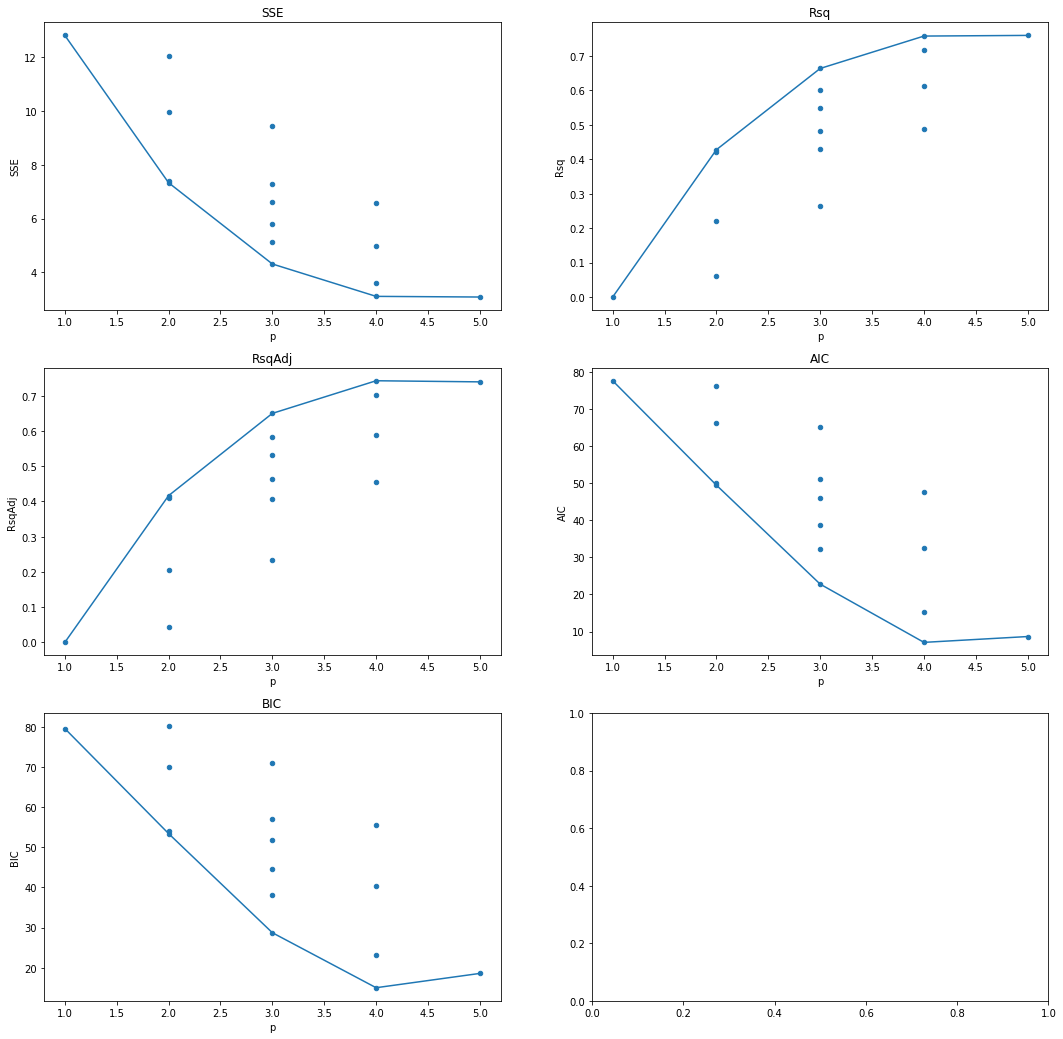

In [17]:
criteria_h = ["SSE", "Rsq", "RsqAdj", "AIC", "BIC"]
goal = [0, 1, 1, 0, 0]
x = list(range(1, len(pred)+2))

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
for key, g, ax in zip(criteria_h, goal, axes.flatten()):
    _ = df_c.plot.scatter("p", key, ax=ax)
    if (g==0): 
        ax.plot(x, df_c.groupby("p").min()[key])
    else:
        ax.plot(x, df_c.groupby("p").max()[key])
    ax.title.set_text(key)

# 9.4 Automatic Search Procedures for Model Selection (p 361)

### Figure 9.6 (p 363)

Output for "Best" Two Subsets for Each Subset Size -- Surgical Unit Example

##### Note

I just include all examples. Not sure if there is an easy dataframes way to select the "best" 2 among each `p`. Superfluous, nonetheless. We can filter the dataframe for the optimal criteria per p group.

In [18]:
pred = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
combos = [[" + ".join(item) for item in iter.combinations(pred, r)] for r in range(1, len(pred)+1)]
formulas = ["lnY ~ 1"] + [f"lnY ~ 1 + {p}" for parameters in combos for p in parameters]
models = [ols(f, df).fit() for f in formulas]
criteria = [model_summary(model) for model in models]
df_c = pd.DataFrame(criteria, columns = ['Variables', "p", 'SSE', 'Rsq', 'RsqAdj', 'AIC', 'BIC'])
display(df_c)

,Variables,p,SSE,Rsq,RsqAdj,AIC,BIC
0,[],1,12.807725,-2.220446e-16,-2.220446e-16,77.542844,79.531828
1,[X1],2,12.031469,6.060847e-02,4.254324e-02,76.166607,80.144575
2,[X2],2,9.979182,2.208467e-01,2.058629e-01,66.067284,70.045252
3,[X3],2,7.331575,4.275662e-01,4.165579e-01,49.418500,53.396468
4,[X4],2,7.408731,4.215420e-01,4.104178e-01,49.983821,53.961789
...,...,...,...,...,...,...,...
251,"[X1, X2, X3, X5, X6, X7, X8]",8,1.972032,8.460279e-01,8.225974e-01,-9.490288,6.421584
252,"[X1, X2, X4, X5, X6, X7, X8]",8,4.961592,6.126094e-01,5.536587e-01,40.333467,56.245340
253,"[X1, X3, X4, X5, X6, X7, X8]",8,4.061194,6.829106e-01,6.346579e-01,29.519976,45.431848
254,"[X2, X3, X4, X5, X6, X7, X8]",8,2.288830,8.212931e-01,7.940985e-01,-1.445586,14.466286


### Figure 9.5 (P 362)

Plot of Variable Selection Criteria with All Eight Predicators -- Surgical Unit Example

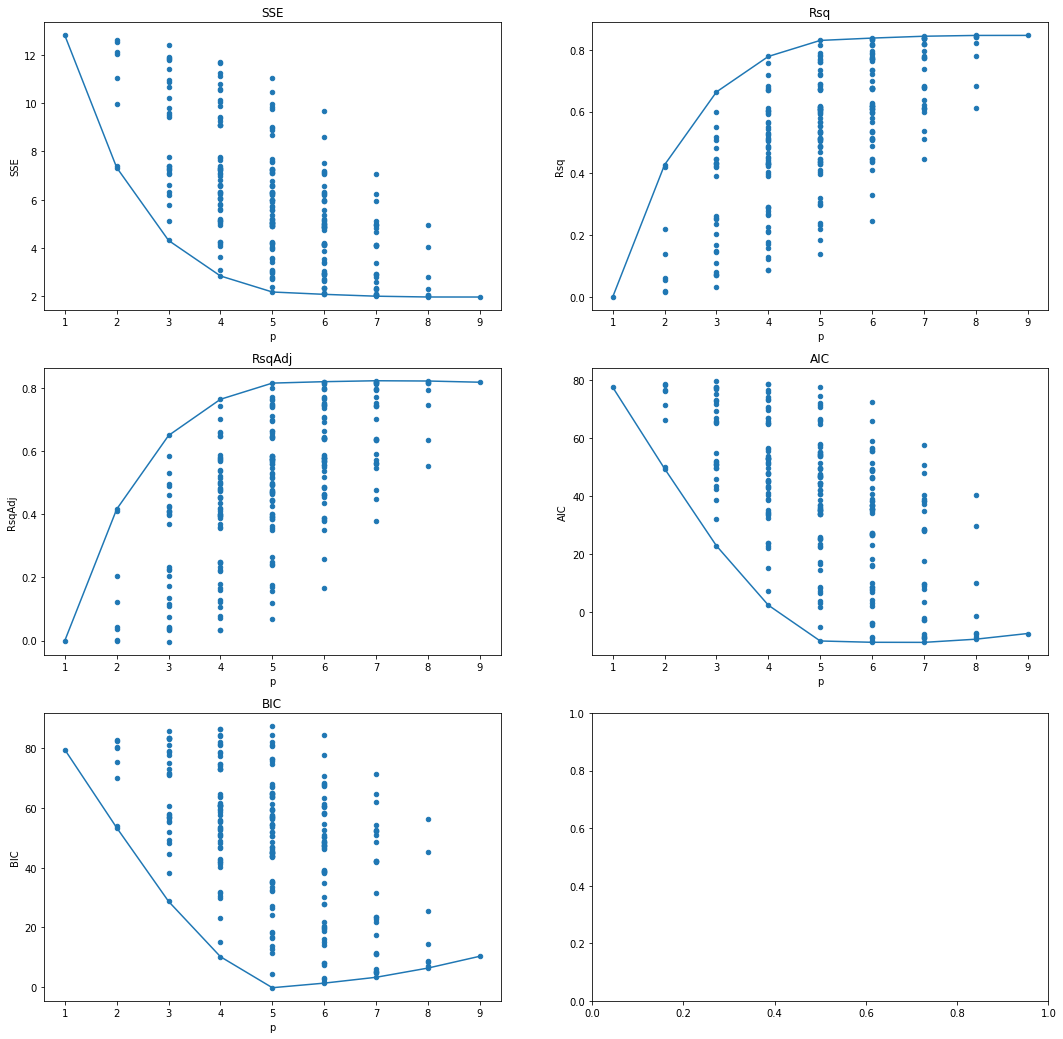

In [19]:
criteria_h = ["SSE", "Rsq", "RsqAdj", "AIC", "BIC"]
goal = [0, 1, 1, 0, 0]
x = list(range(1, len(pred)+2))

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
for key, g, ax in zip(criteria_h, goal, axes.flatten()):
    _ = df_c.plot.scatter("p", key, ax=ax)
    if (g==0): 
        ax.plot(x, df_c.groupby("p").min()[key])
    else:
        ax.plot(x, df_c.groupby("p").max()[key])
    ax.title.set_text(key)

##### Note

The following section on stepwise regression will be postponed for now. I have not found any vanilla built-in packages for doing this. While rolling a custom solution would not be too difficult, the value is just not there. 


# 9.5 Some Final Comments on Automatic Model Selection Procedures (p 368)

# 9.6 Model Validation (p 369)

### Input the Surgical Unit Validation Data

In [20]:
train = pd.read_pickle(f"{DATA_DIR}/CH09TA01.xz")
test = pd.read_pickle(f"{DATA_DIR}/CH09TA05.xz")
train.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y', 'lnY']
test.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y', 'lnY']


Here we fit the 3 models (p 373) that our criteria suggested

$Y^{'}_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \beta_3 X_{i3} + \beta_8 X_{i8}$ (9.21)

$Y^{'}_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \beta_3 X_{i3} + \beta_5 X_{i5} + \beta_8 X_{i8}$ (9.22)

$Y^{'}_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \beta_3 X_{i3} + \beta_5 X_{i5} + \beta_6 X_{i6} + \beta_8 X_{i8}$ (9.23)

In [21]:
f1 = "lnY ~ X1 + X2 + X3 + X8"
f2 = "lnY ~ X1 + X2 + X3 + X5 + X8"
f3 = "lnY ~ X1 + X2 + X3 + X5 + X6 + X8"

model1_train = ols(f1, train).fit()
model1_test = ols(f1, test).fit()

model2_train = ols(f2, train).fit()
model2_test = ols(f2, test).fit()

model3_train = ols(f3, train).fit()
model3_test = ols(f3, test).fit()

### Table 9.4

Regression Result for Candidate Models (9.21), (9.22), (9.23) Based on Model-Building and Validation Data Sets -- Surgical Unit Example

Instead of reproducing the entire table, I'm just going to demonstrate how to access some key attributes and compute the MSPR. 

##### Note

I notice model 2 appears to be different than the book. No idea why, but given model 1 and 3 align, I'll assume it was an error in the book. 

In [37]:
mspr = lambda df, model: sum((df.lnY - model.predict(df))**2) / len(df)

pd.DataFrame({
    "model1": [model1_train.ssr, model1_train.mse_resid, model1_train.rsquared_adj, mspr(test, model1_train)],
    "model2": [model2_train.ssr, model2_train.mse_resid, model2_train.rsquared_adj, mspr(test, model2_train)],
    "model3": [model3_train.ssr, model3_train.mse_resid, model3_train.rsquared_adj, mspr(test, model3_train)]
}, 
    index = ["SSE", "MSE", "RsqAdj", "MSPR"]
).round(4)

,model1,model2,model3
SSE,2.1788,2.1029,2.0052
MSE,0.0445,0.0438,0.0427
RsqAdj,0.8160,0.8187,0.8234
MSPR,0.0773,0.0801,0.0794


### Table 9.5

Potential Predictor Variables and Response Variable -- Surgical Unit Example

##### Note

For completeness, I just display both training and validation sets.

In [38]:
train

,X1,X2,X3,X4,X5,X6,X7,X8,Y,lnY
0,6.7,62,81,2.59,50,0,1,0,695,6.544
1,5.1,59,66,1.70,39,0,0,0,403,5.999
2,7.4,57,83,2.16,55,0,0,0,710,6.565
3,6.5,73,41,2.01,48,0,0,0,349,5.854
4,7.8,65,115,4.30,45,0,0,1,2343,7.759
5,5.8,38,72,1.42,65,1,1,0,348,5.852
6,5.7,46,63,1.91,49,1,0,1,518,6.250
7,3.7,68,81,2.57,69,1,1,0,749,6.619
8,6.0,67,93,2.50,58,0,1,0,1056,6.962
9,3.7,76,94,2.40,48,0,1,0,968,6.875


In [39]:
test

,X1,X2,X3,X4,X5,X6,X7,X8,Y,lnY
0,7.1,23,78,1.93,45,0,1,0,302,5.710
1,4.9,66,91,3.05,34,1,0,0,767,6.642
2,6.4,90,35,1.06,39,1,0,1,487,6.188
3,5.7,35,70,2.13,68,1,0,0,242,5.489
4,6.1,42,69,2.25,70,0,0,1,705,6.558
5,8.0,27,83,2.03,35,1,1,0,716,6.574
6,6.8,34,51,1.27,44,0,0,0,266,5.583
7,4.7,63,36,1.71,36,0,0,1,361,5.889
8,7.0,47,67,1.60,54,0,1,0,460,6.131
9,6.7,69,65,2.91,61,1,0,1,1060,6.966


# References

[Linear Model Regression Results (statsmodels)](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html)

[Contrast Coding (statsmodels)](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

[QQ Plot or Normal Probability Plot (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

[Levene or Brown-Forsythe Test (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

[Z-Score Transformation (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

[Box Cox Transformations (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

[Influence Metrics (statsmodels)](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

### Graphics

[Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

[Matplotlib Color Maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

[Added-Variable (partial regression) Plots](https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_partregress.html)

[Influence Plots](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.plot_influence.html)